# Exploratory Data Analysis (EDA) on the Titanic Dataset
## Unique Features of this Notebook
1. **Missing Value imputation** using mean as strategy on numerical variables
2. **Missing Value imputation** using most frequent value as strategy for nominal variable
3. **Feature Engineering** create new features from existing ones (Survival Rate)
4. **Getting data ready for Heatmap** This notebook explain the process of making data ready for making heatmap
5. **Encoding categorical** variables using Label Encoder


# Lets begin this insightful journey

## Import the necessary libraries

In [272]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

### Load the Titanic dataset from Seaborn and have a first look at the dataset and Display the first few rows of the dataset

```python


In [273]:
titanic_data = sns.load_dataset('titanic')

print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### It appears that there are large number of columnns which might be replicated.Therefore, it is pertinant to look at the listing the columns of dataset to screen for necessary columns

In [274]:

titanic_data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### Dropping the unnecessary and replicated columns


In [275]:
titanic_data.drop(columns=['pclass','deck','who','adult_male','deck','embarked', 'alive',
       'alone'],axis=1,inplace=True)

### Get an overview of the dataset for accessing the missing values as well as the data types of the columns

In [276]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          714 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   class        891 non-null    category
 7   embark_town  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 49.9+ KB
None


### Impute the missing values in the age column with the mean of the column and the missing values in the embarked_town column with the mode of the column


In [277]:
titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)
titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0], inplace=True)

### Run the data info to confirm that missing values are imputed successfully

In [278]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          891 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   class        891 non-null    category
 7   embark_town  891 non-null    object  
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 49.9+ KB


### Now analyze the dataframe for encoding the categorical variables

In [279]:
titanic_data.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town
0,0,male,22.0,1,0,7.2500,Third,Southampton
1,1,female,38.0,1,0,71.2833,First,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,Southampton
3,1,female,35.0,1,0,53.1000,First,Southampton
4,0,male,35.0,0,0,8.0500,Third,Southampton


### Now data is free from missing values, so there is time to start EDA. First of all, let's visualize the survival rate by passenger class and sex

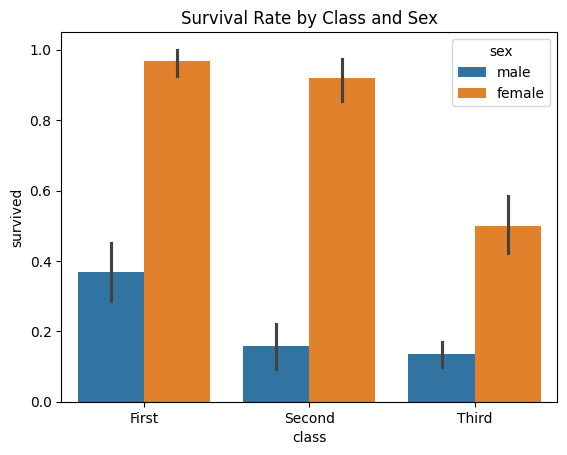

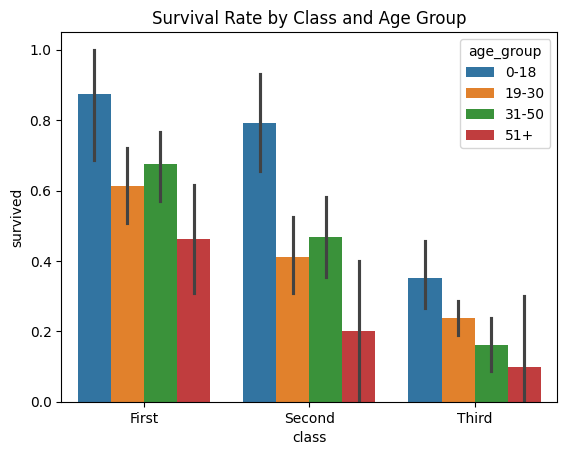

In [280]:
sns.barplot(data=titanic_data, x='class', y='survived', hue='sex')
plt.title('Survival Rate by Class and Sex')
plt.show()

# Visualize the count of passengers by their survival status and age group
age_bins = [0, 18, 30, 50, 80]
age_labels = ['0-18', '19-30', '31-50', '51+']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=age_bins, labels=age_labels)

# Visualize the survival rate by passenger class and age group
sns.barplot(data=titanic_data, x='class', y='survived', hue='age_group')
plt.title('Survival Rate by Class and Age Group')
plt.show()


### Simple Histogram of the age and fare column using seaborn

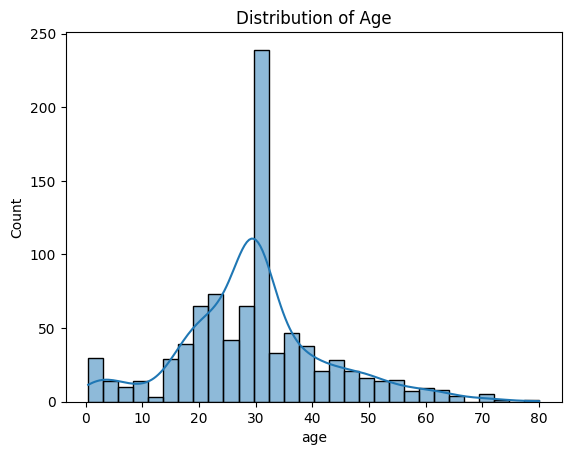

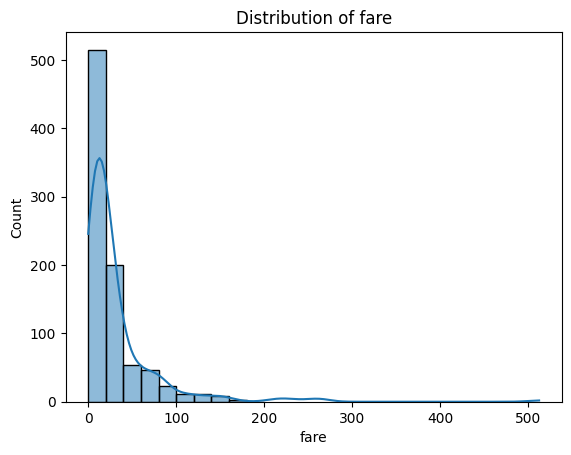

In [281]:
sns.histplot(titanic_data['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(data=titanic_data, x='fare', kde=True,binwidth=20,binrange=(0,200))
plt.title('Distribution of fare')
plt.show()

### Next, Visualize the distribution of age and fare variable using dynamic tools in seaborn

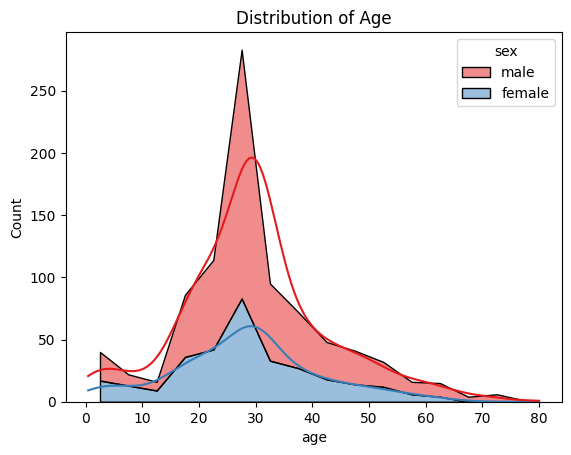

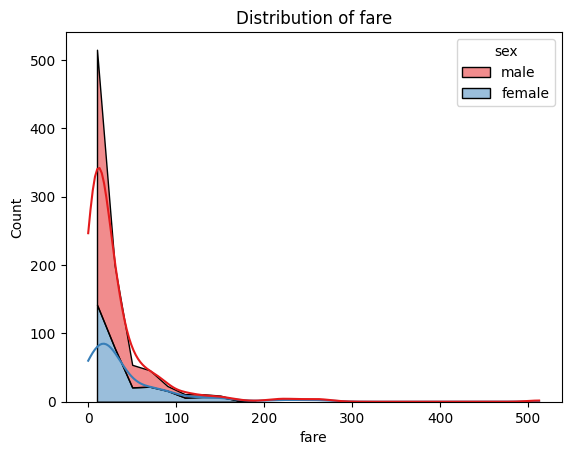

In [282]:
sns.histplot(data=titanic_data, x='age', kde=True,binwidth=5,binrange=(0,80),color='red',hue='sex',multiple='stack',palette='Set1',element='poly',fill=True,common_norm=False,common_bins=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(data=titanic_data, x='fare', kde=True,binwidth=20,binrange=(0,200),color='red',hue='sex',multiple='stack',palette='Set1',element='poly',fill=True,common_norm=False,common_bins=True)
plt.title('Distribution of fare')
plt.show()

### Visualize the countplot for the following:
 1. count of passengers in each class
 2. count of passengers by their survival status and class
 3. count of passengers by their survival status and sex
 4. count of passengers by their survival status and age group

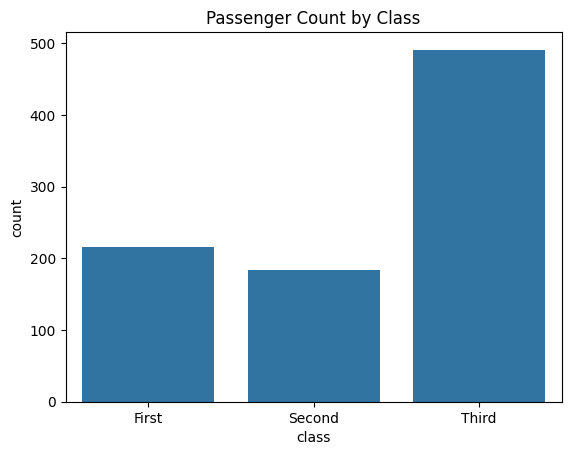

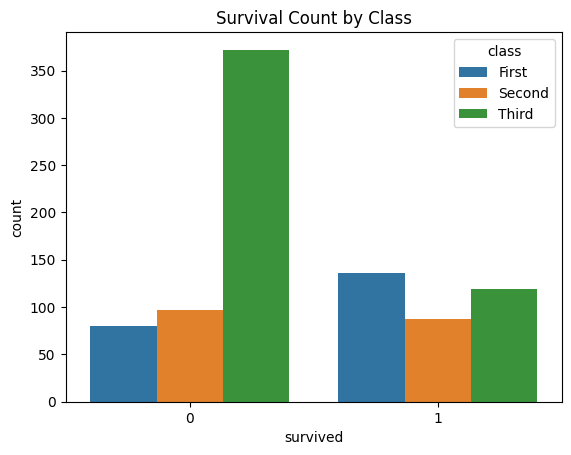

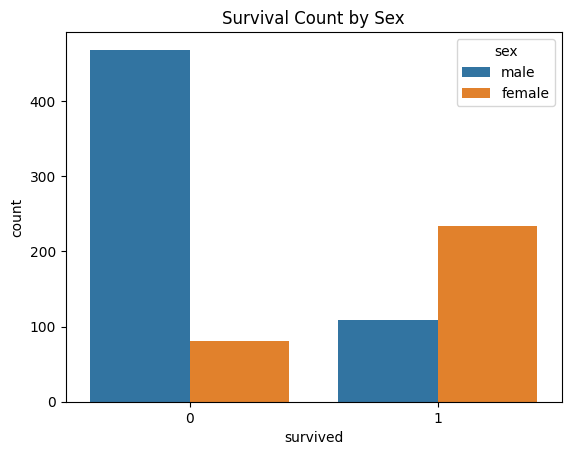

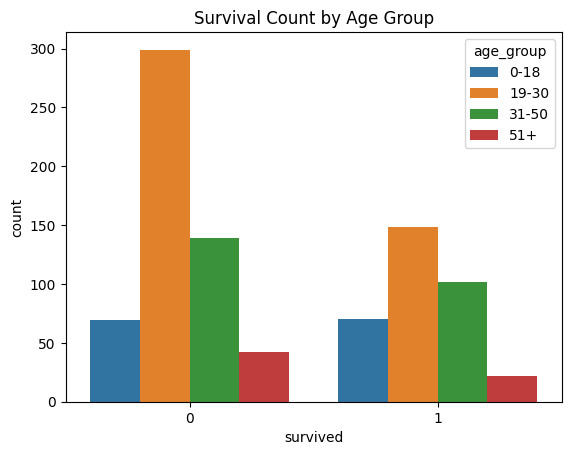

In [283]:
sns.countplot(data=titanic_data, x='class')
plt.title('Passenger Count by Class')
plt.show()

sns.countplot(data=titanic_data, x='survived', hue='class')
plt.title('Survival Count by Class')
plt.show()

sns.countplot(data=titanic_data, x='survived', hue='sex')
plt.title('Survival Count by Sex')
plt.show()

age_bins = [0, 18, 30, 50, 80]
age_labels = ['0-18', '19-30', '31-50', '51+']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=age_bins, labels=age_labels)
sns.countplot(data=titanic_data, x='survived', hue='age_group')
plt.title('Survival Count by Age Group')
plt.show()

### Now its time to get the dataset ready for making heatmap which is based on correlation analysis. For this purpose, we will encode the categorical variables. Beside age_group column will be droped from the dataset as it is not need.

#### First encode the sex column and embark_town column using LabelEncoder

In [284]:


le_sex = LabelEncoder()
titanic_data['sex']=le_sex.fit_transform(titanic_data['sex'])


le_embark_town = LabelEncoder()
titanic_data['embark_town']= le_embark_town.fit_transform(titanic_data['embark_town'])

### Apply ordinal encoding to the class column as it will maintain the essence of the data


In [285]:
class_mapping = {'First': 1, 'Second': 2, 'Third': 3}
titanic_data['class'] = titanic_data['class'].map(class_mapping)

#### drop age_group column as it is not needed

In [286]:
titanic_data.drop(columns=['age_group'], axis=1, inplace=True)

### Assessing the dataframe to confirm that encoding is done successfully

In [287]:
titanic_data.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town
0,0,1,22.0,1,0,7.2500,3,2
1,1,0,38.0,1,0,71.2833,1,0
2,1,0,26.0,0,0,7.9250,3,2
3,1,0,35.0,1,0,53.1000,1,2
4,0,1,35.0,0,0,8.0500,3,2


### Visualize the correlation between numerical variables and present it using heatmap


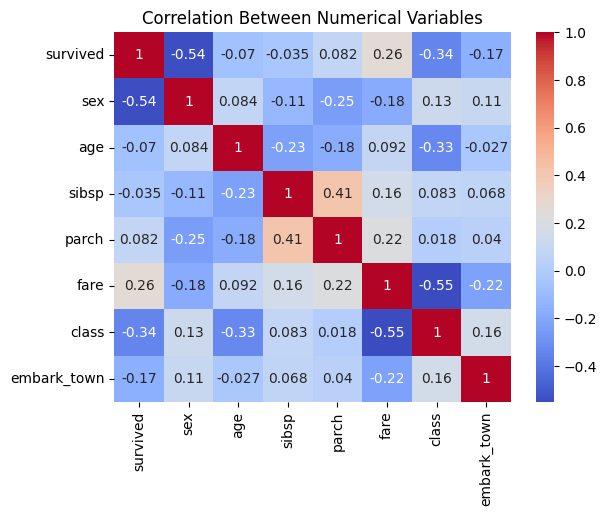

In [288]:

sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Variables')
plt.show()

#### Calculate the survival rate by passenger class

In [290]:
# warning off
import warnings
warnings.filterwarnings('ignore')
class_survival_rate = titanic_data.groupby('class')['survived'].mean()
print(class_survival_rate)


class
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


<Axes: xlabel='class'>

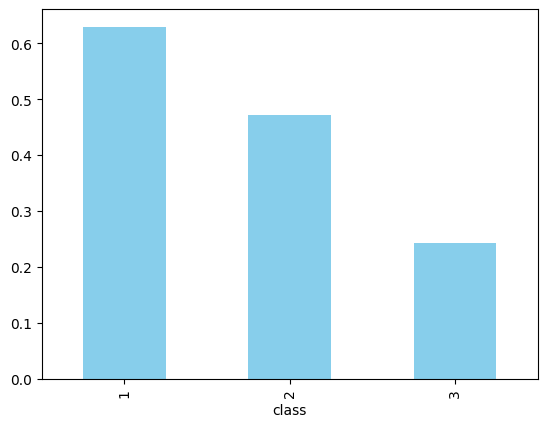

In [297]:
# presenting the class survial rate in a bar plot and taking sex as hue

class_survival_rate.plot(kind='bar', color='skyblue')

class
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


<Axes: xlabel='sex'>

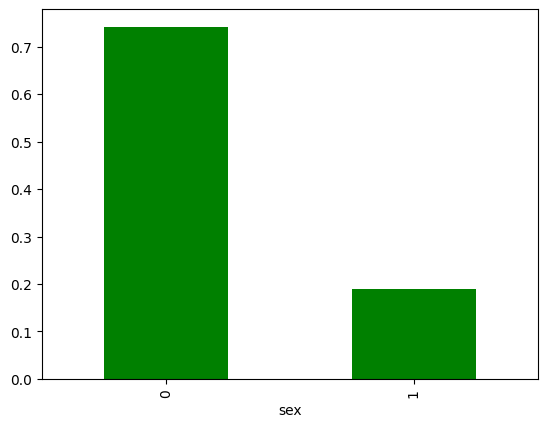

In [302]:
gender_survival_rate = titanic_data.groupby('sex')['survived'].mean()
print(class_survival_rate)
gender_survival_rate.plot(kind='bar', color='green')